# MNIST from scratch?

The goal is to try and create a classifier for the MNST Dataset then implemnt it from scratch similar to PyTorch

In [88]:
import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm as trange
import os, hashlib

In [83]:
# load the mnist dataset
#https://github.com/geohot/ai-notebooks/blob/master/mnist_from_scratch.ipynb

def fetch(url):
  fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
  if os.path.isfile(fp):
    with open(fp, "rb") as f:
      dat = f.read()
  else:
    with open(fp, "wb") as f:
      dat = requests.get(url).content
      f.write(dat)
  return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()
X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [99]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [145]:
class nnet(torch.nn.Module):
    def __init__(self):
        super(nnet, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 10)
        self.soft = nn.LogSoftmax(dim=1)
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        x = self.soft(x)
        return x

In [157]:
model = nnet()
lr = 0.001
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr)

In [204]:
batchSize = 128
for i in trange(range(1000)):
    #Create a random sample of the training images
    model.zero_grad()
    sample  = np.random.randint(0, X_train.shape[0], size=(batchSize))
    
    #Create the input while slicing the original training data using the randome indices with the batch size
    X = torch.tensor(X_train[sample], dtype = torch.float32).reshape(-1, 28*28)
    Y = torch.tensor(Y_train[sample], dtype = torch.long)
    Y_pred = model(X)
    
    loss = loss_fn(Y_pred, Y)
    accuracy = (Y == torch.argmax(Y_pred, dim=1)).float().mean()
    optim.zero_grad()
    loss.backward()
    optim.step()

100%|██████████| 1000/1000 [00:02<00:00, 436.59it/s]


8


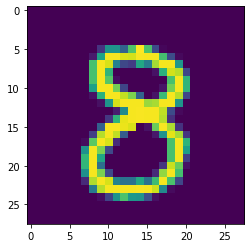

In [205]:
print(Y[0].item())
plt.imshow(X.reshape(-1,28,28)[0])

## From scratch!

Going to try and create the same results using just Numpy